In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import imdb

In [0]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [34]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [35]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_idx = imdb.get_word_index()

In [0]:
idx_word = dict([value, key] for (key, value) in word_idx.items())

In [0]:
# get a review
# ? - replace those with ? which are not in the vocabulary

review = ' '.join(idx_word.get(idx-3, '?') for idx in x_train[0])

In [39]:
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
## Create a 2-D tensor to be processed by the embedding layer
from keras.preprocessing import sequence


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [42]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#### Create Model

In [0]:
from keras.models import Sequential
from keras.layers import *

In [0]:
rnn = Sequential()

In [0]:
rnn.add(Embedding(10000,64))

In [0]:
rnn.add(LSTM(32)) # unit is not the number of cells but activation dims
#rnn.add(LSTM(32)) # unit is not the number of cells but activation dims
#rnn.add(LSTM(32)) # unit is not the number of cells but activation dims

In [0]:
rnn.add(Dense(1, activation='sigmoid'))

In [48]:
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 652,449
Trainable params: 652,449
Non-trainable params: 0
_________________________________________________________________


In [49]:
# compiling model
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0818 08:32:27.236892 140614441604992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 08:32:27.275494 140614441604992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0818 08:32:27.283697 140614441604992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
cp = keras.callbacks.ModelCheckpoint('best_model_rnn.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period = 1)
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3)

In [51]:
hist = rnn.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=10, callbacks=[cp, es])

W0818 08:32:28.397952 140614441604992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.6565 - acc: 0.6657 - val_loss: 0.5939 - val_acc: 0.7376
Epoch 2/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.4618 - acc: 0.8206 - val_loss: 0.3775 - val_acc: 0.8386
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2913 - acc: 0.8863 - val_loss: 0.3365 - val_acc: 0.8596
Epoch 4/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.2090 - acc: 0.9244 - val_loss: 0.3161 - val_acc: 0.8680
Epoch 5/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1617 - acc: 0.9469 - val_loss: 0.3444 - val_acc: 0.8660


In [0]:
def plot_loss_accuracy(hist):
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()



training_loss = 0.1617089646577835    val_loss = 0.3444158097267151
training_acc = 94.685    val_acc = 86.59999998092651


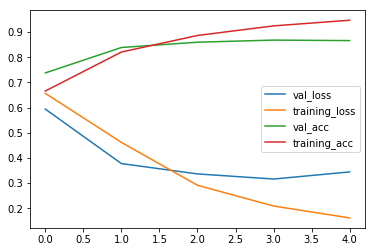

In [53]:
plot_loss_accuracy(hist)

In [0]:
# we need not save our model anymore because we have checkpoint
# rnn.save('rnn.h5')

In [55]:
!ls

best_model_rnn.h5  sample_data


In [0]:
rnn.load_weights('best_model_rnn.h5')

In [57]:
rnn.evaluate(x_test, y_test)

25000/25000 [==============================] - 133s 5ms/step


[0.31936440802574156, 0.86756]

In [58]:
rnn.evaluate(x_train, y_train)

25000/25000 [==============================] - 134s 5ms/step


[0.1912246680355072, 0.93616]